# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])
df = df.sort_values('amount')

In [4]:
df

,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action
78,eosio.vpay,2022-10-21 22:00:02,2022-10-21 22:00:02,127.0384,EOS,eosio.vpay,eosvenezuela,274426331,d2c797d49f359cb8943aff2d3cb4d27828239c0f4683d2...,producer vote pay,eosio.token,transfer
37,eosio.vpay,2022-10-23 07:10:12,2022-10-23 07:10:12,130.0937,EOS,eosio.vpay,eosbixinboot,274665078,a33ee5093949bb4d1ba351aefa25012401b56572a4d379...,producer vote pay,eosio.token,transfer
35,eosio.vpay,2022-10-22 07:10:05,2022-10-22 07:10:05,130.6153,EOS,eosio.vpay,eosbixinboot,274492307,1ac936625dbedf20364eb3e81ada1205714f26e10cf185...,producer vote pay,eosio.token,transfer
35,eosio.vpay,2022-10-21 07:09:18,2022-10-21 07:09:18,131.6298,EOS,eosio.vpay,eosbixinboot,274319490,369308ac916f29bfcbb65bc8300869b6a71b270d1d9138...,producer vote pay,eosio.token,transfer
76,eosio.vpay,2022-10-22 23:00:06,2022-10-22 23:00:06,134.4285,EOS,eosio.vpay,eosvenezuela,274606277,f65eb8fb01b6569549ca66fb8449641d14cc13cd93e29f...,producer vote pay,eosio.token,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
50,eosio.vpay,2022-10-22 13:32:42,2022-10-22 13:32:42,684.4808,EOS,eosio.vpay,eosinfstones,274538205,99b7ed656488a66039444f01e3a61670265dd87fea5a92...,producer vote pay,eosio.token,transfer
52,eosio.vpay,2022-10-24 13:54:56,2022-10-24 13:54:56,691.2311,EOS,eosio.vpay,eosinfstones,274886262,ae1d2b6284de0a6b10e5af91672d6c4ab4d9f707e68715...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-22 00:03:42,2022-10-22 00:03:42,696.6950,EOS,eosio.vpay,newdex.bp,274441166,5fa20d887d825e7a09618b47829c85177fa209c8fa92fe...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-21 00:03:31,2022-10-21 00:03:31,699.3684,EOS,eosio.vpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer vote pay,eosio.token,transfer


In [5]:
from pysankey import sankey
import seaborn as sns

In [6]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


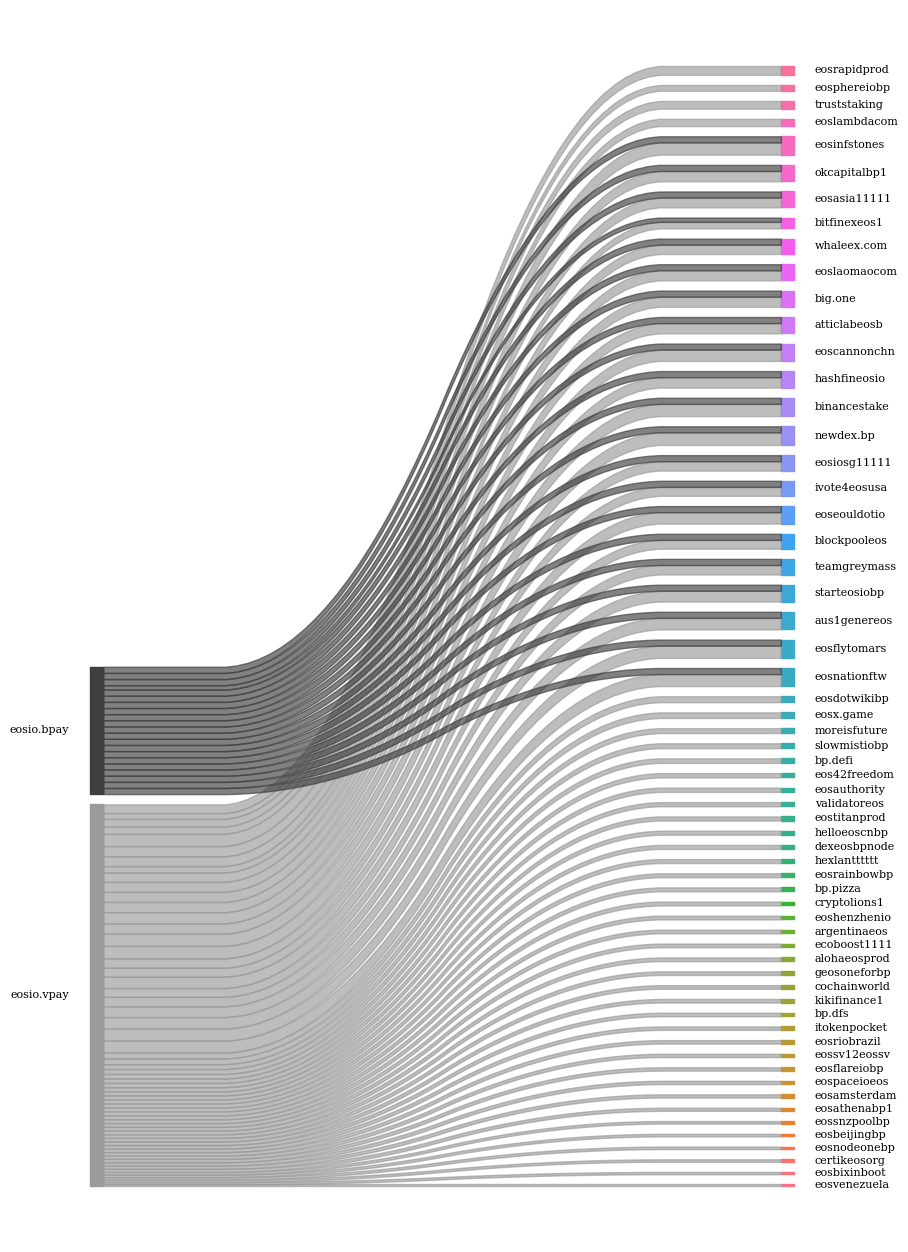

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)